In [2]:
import cplane_np as cp
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Cplane_np.py Demonstration

## The Constructor

In [5]:
myPlane = cp.ArrayComplexPlane(-4,4,9,-4,4,9)
myPlane.printPlane()
myPlane.getPlane()

########################################-Complex Plane-######################################## 

        -4.0     -3.0     -2.0     -1.0   0.0     1.0     2.0     3.0     4.0
4j   (-4+4j)  (-3+4j)  (-2+4j)  (-1+4j)    4j  (1+4j)  (2+4j)  (3+4j)  (4+4j)
3j   (-4+3j)  (-3+3j)  (-2+3j)  (-1+3j)    3j  (1+3j)  (2+3j)  (3+3j)  (4+3j)
2j   (-4+2j)  (-3+2j)  (-2+2j)  (-1+2j)    2j  (1+2j)  (2+2j)  (3+2j)  (4+2j)
1j   (-4+1j)  (-3+1j)  (-2+1j)  (-1+1j)    1j  (1+1j)  (2+1j)  (3+1j)  (4+1j)
0j   (-4+0j)  (-3+0j)  (-2+0j)  (-1+0j)    0j  (1+0j)  (2+0j)  (3+0j)  (4+0j)
-1j  (-4-1j)  (-3-1j)  (-2-1j)  (-1-1j)   -1j  (1-1j)  (2-1j)  (3-1j)  (4-1j)
-2j  (-4-2j)  (-3-2j)  (-2-2j)  (-1-2j)   -2j  (1-2j)  (2-2j)  (3-2j)  (4-2j)
-3j  (-4-3j)  (-3-3j)  (-2-3j)  (-1-3j)   -3j  (1-3j)  (2-3j)  (3-3j)  (4-3j)
-4j  (-4-4j)  (-3-4j)  (-2-4j)  (-1-4j)   -4j  (1-4j)  (2-4j)  (3-4j)  (4-4j) 

############################################################################################### 



,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0
4j,(-4+4j),(-3+4j),(-2+4j),(-1+4j),4j,(1+4j),(2+4j),(3+4j),(4+4j)
3j,(-4+3j),(-3+3j),(-2+3j),(-1+3j),3j,(1+3j),(2+3j),(3+3j),(4+3j)
2j,(-4+2j),(-3+2j),(-2+2j),(-1+2j),2j,(1+2j),(2+2j),(3+2j),(4+2j)
1j,(-4+1j),(-3+1j),(-2+1j),(-1+1j),1j,(1+1j),(2+1j),(3+1j),(4+1j)
0j,(-4+0j),(-3+0j),(-2+0j),(-1+0j),0j,(1+0j),(2+0j),(3+0j),(4+0j)
-1j,(-4-1j),(-3-1j),(-2-1j),(-1-1j),-1j,(1-1j),(2-1j),(3-1j),(4-1j)
-2j,(-4-2j),(-3-2j),(-2-2j),(-1-2j),-2j,(1-2j),(2-2j),(3-2j),(4-2j)
-3j,(-4-3j),(-3-3j),(-2-3j),(-1-3j),-3j,(1-3j),(2-3j),(3-3j),(4-3j)
-4j,(-4-4j),(-3-4j),(-2-4j),(-1-4j),-4j,(1-4j),(2-4j),(3-4j),(4-4j)


In the above code, we created the ArrayComplexPlane(xmin,xmax,xlen,ymin,ymax,ylen) object, setting arbituary Plane specifications. in this case, we set its range and domain to
    $$ -4 \ge x \ge 4 $$
    $$ -4 \ge y \ge 4 $$
with a step sixe of 1 (since the domain spans over 9 integers and xlen = 9 => 9/9 = 1 = step size, symmetric for y step size)

this is our constructor in python
```python
def __init__(self,xmin,xmax,xlen,ymin,ymax,ylen):
        self.__setPlane(xmin,xmax,xlen,ymin,ymax,ylen)
        return

def __setPlane(self,xmin,xmax,xlen,ymin,ymax,ylen):
        self.xmin  = xmin
        self.xmax  = xmax
        self.xlen  = xlen
        self.ymin  = ymin
        self.ymax  = ymax
        self.ylen  = ylen
        self.fs = []

        x = np.linspace(self.xmin,self.xmax,self.xlen)
        y = np.linspace(self.ymin,self.ymax,self.ylen)
        xx, yy = np.meshgrid(x, y)
        self.plane = xx - yy*1j

        self.plane = pd.DataFrame(self.plane, index=-y*1j+0, columns=x)

        return
```
in our constructor we call a private funnction called
```python
__setPlane(self,xmin,xmax,xlen,ymin,ymax,ylen)
```
where we initialize our arguments to the given input and initialize self.fs = []. After args are implemented, __setPlane( self, xmin, xmax, xlen, ymin, ymax, ylen ) then implements self.plane by using numpy to create the real and imaginary axis with linspace(), it then creates a meshgrid of the range and  domain and is finally re-represented in complex form. then we use a panda to create the Data frame of self.plane.
And finally, our function has no return value and terminates

## The Apply Function

In [6]:
def f(x):
    return x*x

myPlane.apply(f)
myPlane.getPlane()

,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0
4j,-32j,(-7-24j),(-12-16j),(-15-8j),(-16+0j),(-15+8j),(-12+16j),(-7+24j),32j
3j,(7-24j),-18j,(-5-12j),(-8-6j),(-9+0j),(-8+6j),(-5+12j),18j,(7+24j)
2j,(12-16j),(5-12j),-8j,(-3-4j),(-4+0j),(-3+4j),8j,(5+12j),(12+16j)
1j,(15-8j),(8-6j),(3-4j),-2j,(-1+0j),2j,(3+4j),(8+6j),(15+8j)
0j,(16-0j),(9-0j),(4-0j),(1-0j),0j,(1+0j),(4+0j),(9+0j),(16+0j)
-1j,(15+8j),(8+6j),(3+4j),2j,(-1-0j),-2j,(3-4j),(8-6j),(15-8j)
-2j,(12+16j),(5+12j),8j,(-3+4j),(-4-0j),(-3-4j),-8j,(5-12j),(12-16j)
-3j,(7+24j),18j,(-5+12j),(-8+6j),(-9-0j),(-8-6j),(-5-12j),-18j,(7-24j)
-4j,32j,(-7+24j),(-12+16j),(-15+8j),(-16-0j),(-15-8j),(-12-16j),(-7-24j),-32j


in the above code block, we applied f(x) to the plane from the previous example. in this specific case,
     $$ f(x) = x^{2} $$
to test whether or not this table is the true transformation, lets take element $ -4 + 4j $ from the Plane before the transformation, we see that $ -32j $ is the transformed value in the plane printed above. so
$$ (-4 + 4j)^2 = 16 - 16j - 16j + 16j^2 = -32j $$
so the transformation f on the complex plane is working correctly

this is our apply in python
```python
def apply(self, f, addTofs):
        self.fs.append(f)
        self.plane = f(self.plane)
        return
```
our apply( self, f ) function appends the f to fs .
the function then procedes to apply the function to all points in self.plane, and sets self.plane to the new transformed plane. this is done in the line
```python
self.plane = f(self.plane)
```
and finally, our function has no return value and terminates

## The Zoom Function

In [7]:
myPlane.zoom(-2,2,5,-2,2,5)
print("ZOOMED PLANE")
myPlane.printPlane()
myPlane.getPlane()

ZOOMED PLANE
########################################-Complex Plane-######################################## 

       -2.0     -1.0      0.0      1.0     2.0
2j      -8j  (-3-4j)  (-4+0j)  (-3+4j)      8j
1j   (3-4j)      -2j  (-1+0j)       2j  (3+4j)
0j   (4-0j)   (1-0j)       0j   (1+0j)  (4+0j)
-1j  (3+4j)       2j  (-1-0j)      -2j  (3-4j)
-2j      8j  (-3+4j)  (-4-0j)  (-3-4j)     -8j 

############################################################################################### 



,-2.0,-1.0,0.0,1.0,2.0
2j,-8j,(-3-4j),(-4+0j),(-3+4j),8j
1j,(3-4j),-2j,(-1+0j),2j,(3+4j)
0j,(4-0j),(1-0j),0j,(1+0j),(4+0j)
-1j,(3+4j),2j,(-1-0j),-2j,(3-4j)
-2j,8j,(-3+4j),(-4-0j),(-3-4j),-8j


ater zoom(xmin,xmax,xlen,ymin,ymax,ylen) is applied to the plane, the private attributes of plane are changed to the input values in zoom. All f in fs are then re-applied to the plane, as you can see, the values at each point remain the same relative to the previous example where f was applied to the plane.

this is our zoom in python
```python
def zoom(self,xmin,xmax,xlen,ymin,ymax,ylen):
        self.__setPlane(xmin,xmax,xlen,ymin,ymax,ylen)
        for k in range(len(self.fs)):
            self.apply(self.fs[k])
        return
```
our function zoom takes in args xmin, xmax, xlen, ymin, ymax, ylen and sets the private args to these values respectively and generating a new plane by calling __setPlane( xmin, xmax, xlen, ymin, ymax, ylen ). then zoom must re-apply all f in fs to the new self.plane. to do this, we used a for loop that it iterates over len( fs )
and applys all functions to self.plane using the apply function.
and finally, we return and terminate the function.

## The Refresh Function

In [17]:
myPlane.refresh()
print("REFRESHED PLANE")
myPlane.printPlane()

REFRESHED PLANE
########################################-Complex Plane-######################################## 

        -2.0     -1.0   0.0     1.0     2.0
2j   (-2+2j)  (-1+2j)    2j  (1+2j)  (2+2j)
1j   (-2+1j)  (-1+1j)    1j  (1+1j)  (2+1j)
0j   (-2+0j)  (-1+0j)    0j  (1+0j)  (2+0j)
-1j  (-2-1j)  (-1-1j)   -1j  (1-1j)  (2-1j)
-2j  (-2-2j)  (-1-2j)   -2j  (1-2j)  (2-2j) 

############################################################################################### 



this is our refresh in python
```python
    def refresh(self):
        self.__setPlane(self.xmin,self.xmax,self.xlen,self.ymin,self.ymax,self.ylen)
        return
```
since refresh is meant to reset the private args to original vals and set fs = [] and regenerate self.plane, we can call _setPlane(). to keep the private vars static, we input our private vars into _setPlane() so that they are set to themselves. Which does seem redundant to have a public function that does exactly what a private function does. however, refresh() requires no input , and therefore the user cannot change private vars like one could in __setPlane(). the difference is minor, but essential for good design and good object oriented programming.
and finally we return and terminate the function

To achieve the primary state from the first example, we can call zoom to zoom out, as shown below

In [4]:
myPlane.zoom(-4,4,9,-4,4,9)
myPlane.printPlane()
myPlane.getPlane()

########################################-Complex Plane-######################################## 

        -4.0     -3.0     -2.0     -1.0   0.0     1.0     2.0     3.0     4.0
4j   (-4+4j)  (-3+4j)  (-2+4j)  (-1+4j)    4j  (1+4j)  (2+4j)  (3+4j)  (4+4j)
3j   (-4+3j)  (-3+3j)  (-2+3j)  (-1+3j)    3j  (1+3j)  (2+3j)  (3+3j)  (4+3j)
2j   (-4+2j)  (-3+2j)  (-2+2j)  (-1+2j)    2j  (1+2j)  (2+2j)  (3+2j)  (4+2j)
1j   (-4+1j)  (-3+1j)  (-2+1j)  (-1+1j)    1j  (1+1j)  (2+1j)  (3+1j)  (4+1j)
0j   (-4+0j)  (-3+0j)  (-2+0j)  (-1+0j)    0j  (1+0j)  (2+0j)  (3+0j)  (4+0j)
-1j  (-4-1j)  (-3-1j)  (-2-1j)  (-1-1j)   -1j  (1-1j)  (2-1j)  (3-1j)  (4-1j)
-2j  (-4-2j)  (-3-2j)  (-2-2j)  (-1-2j)   -2j  (1-2j)  (2-2j)  (3-2j)  (4-2j)
-3j  (-4-3j)  (-3-3j)  (-2-3j)  (-1-3j)   -3j  (1-3j)  (2-3j)  (3-3j)  (4-3j)
-4j  (-4-4j)  (-3-4j)  (-2-4j)  (-1-4j)   -4j  (1-4j)  (2-4j)  (3-4j)  (4-4j) 

############################################################################################### 



,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0
4j,(-4+4j),(-3+4j),(-2+4j),(-1+4j),4j,(1+4j),(2+4j),(3+4j),(4+4j)
3j,(-4+3j),(-3+3j),(-2+3j),(-1+3j),3j,(1+3j),(2+3j),(3+3j),(4+3j)
2j,(-4+2j),(-3+2j),(-2+2j),(-1+2j),2j,(1+2j),(2+2j),(3+2j),(4+2j)
1j,(-4+1j),(-3+1j),(-2+1j),(-1+1j),1j,(1+1j),(2+1j),(3+1j),(4+1j)
0j,(-4+0j),(-3+0j),(-2+0j),(-1+0j),0j,(1+0j),(2+0j),(3+0j),(4+0j)
-1j,(-4-1j),(-3-1j),(-2-1j),(-1-1j),-1j,(1-1j),(2-1j),(3-1j),(4-1j)
-2j,(-4-2j),(-3-2j),(-2-2j),(-1-2j),-2j,(1-2j),(2-2j),(3-2j),(4-2j)
-3j,(-4-3j),(-3-3j),(-2-3j),(-1-3j),-3j,(1-3j),(2-3j),(3-3j),(4-3j)
-4j,(-4-4j),(-3-4j),(-2-4j),(-1-4j),-4j,(1-4j),(2-4j),(3-4j),(4-4j)


## The Plot

In [4]:
myPlane.getPlane()

,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0
4j,(-4+4j),(-3+4j),(-2+4j),(-1+4j),4j,(1+4j),(2+4j),(3+4j),(4+4j)
3j,(-4+3j),(-3+3j),(-2+3j),(-1+3j),3j,(1+3j),(2+3j),(3+3j),(4+3j)
2j,(-4+2j),(-3+2j),(-2+2j),(-1+2j),2j,(1+2j),(2+2j),(3+2j),(4+2j)
1j,(-4+1j),(-3+1j),(-2+1j),(-1+1j),1j,(1+1j),(2+1j),(3+1j),(4+1j)
0j,(-4+0j),(-3+0j),(-2+0j),(-1+0j),0j,(1+0j),(2+0j),(3+0j),(4+0j)
-1j,(-4-1j),(-3-1j),(-2-1j),(-1-1j),-1j,(1-1j),(2-1j),(3-1j),(4-1j)
-2j,(-4-2j),(-3-2j),(-2-2j),(-1-2j),-2j,(1-2j),(2-2j),(3-2j),(4-2j)
-3j,(-4-3j),(-3-3j),(-2-3j),(-1-3j),-3j,(1-3j),(2-3j),(3-3j),(4-3j)
-4j,(-4-4j),(-3-4j),(-2-4j),(-1-4j),-4j,(1-4j),(2-4j),(3-4j),(4-4j)


TypeError: can't convert complex to float

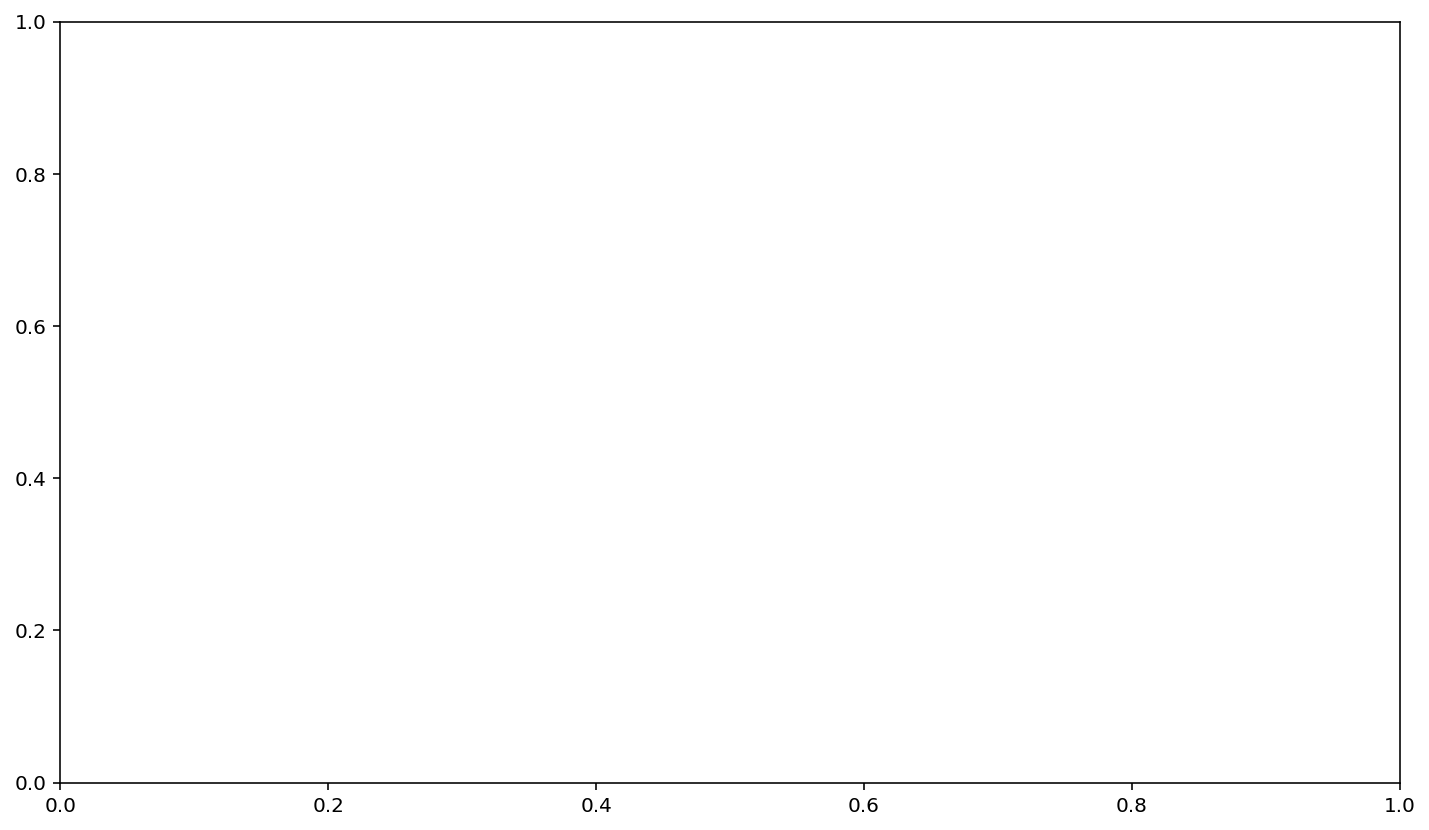

In [8]:
fig = plt.figure(1)
plt.plot(myPlane.getPlane())
plt.show(fig)